<a href="https://colab.research.google.com/github/wurifah/Bisaai/blob/main/regresilinearwuri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

y = Ax +B

y = dependent variable

x = indpendent variable

A = coefficient

B = intercept

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


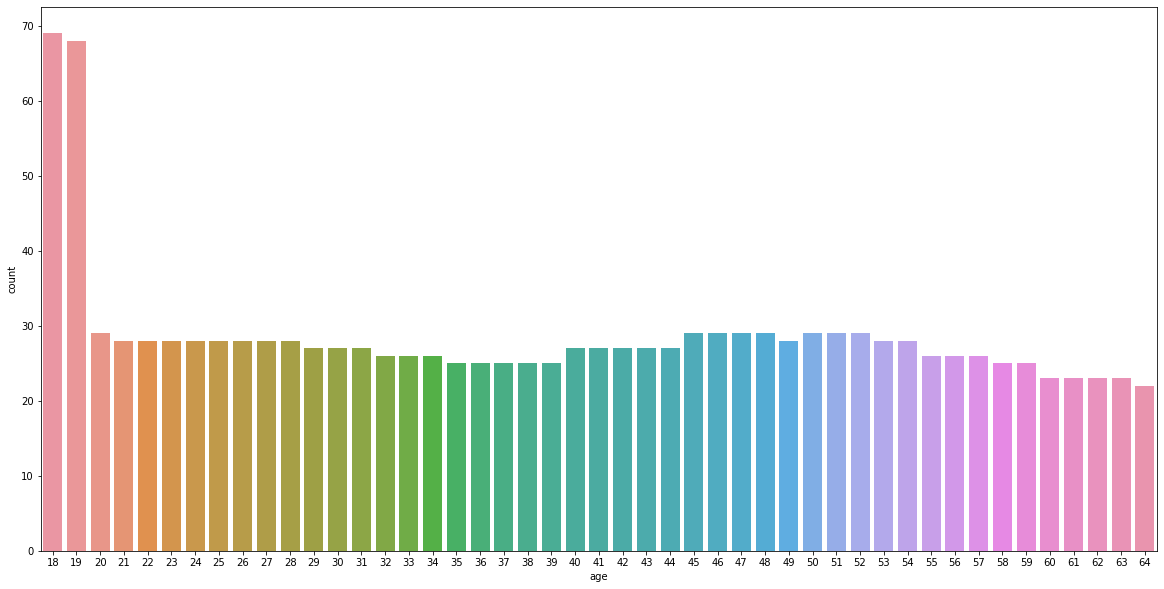

In [5]:
f = plt.figure(figsize=(20,10))
sns.countplot(df['age'])
plt.show()

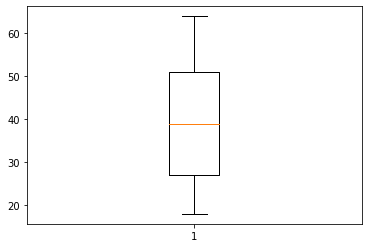

In [6]:
plt.boxplot(df['age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


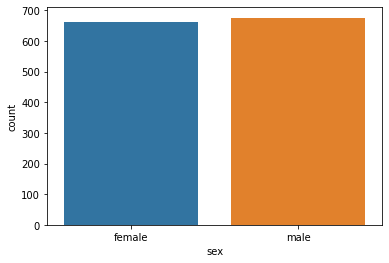

In [7]:
f = plt.figure()
sns.countplot(df['sex'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


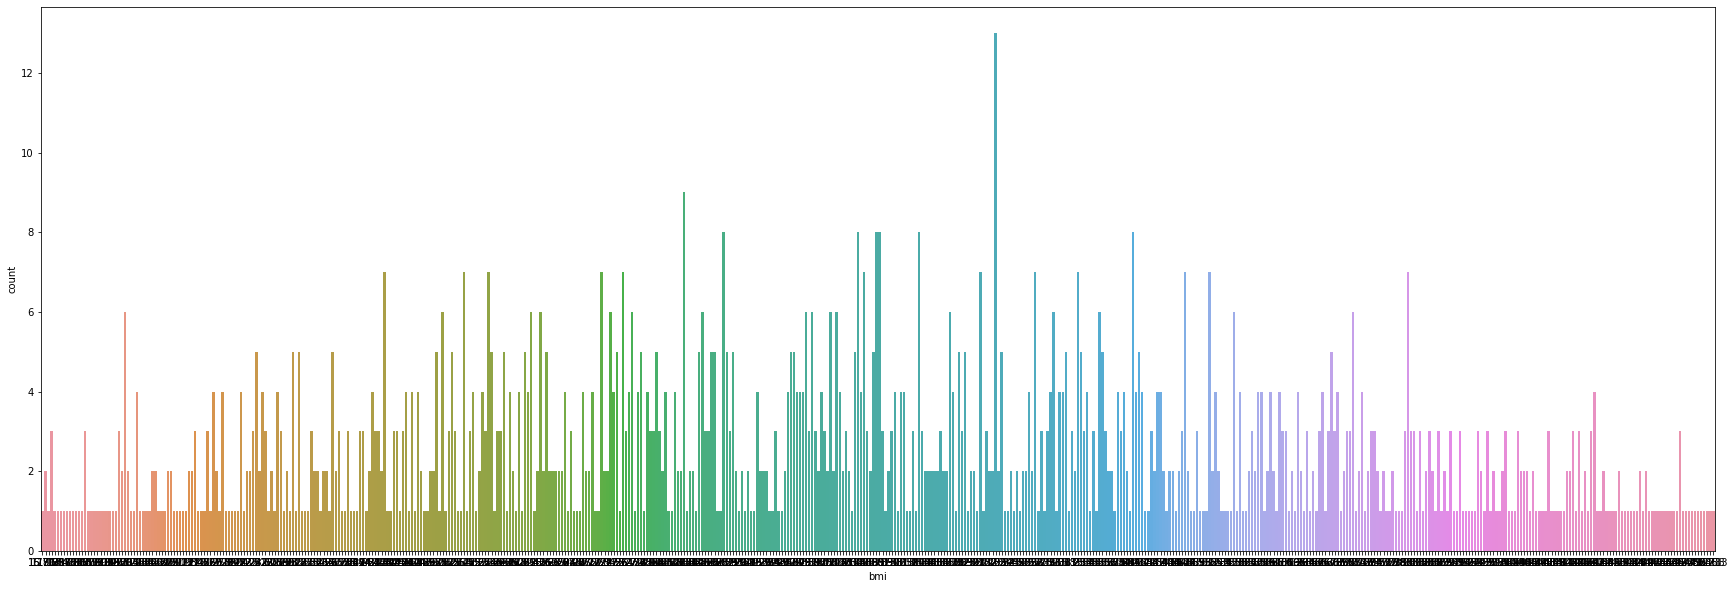

In [8]:
f = plt.figure(figsize=(30,10))
sns.countplot(df['bmi'])
plt.show()

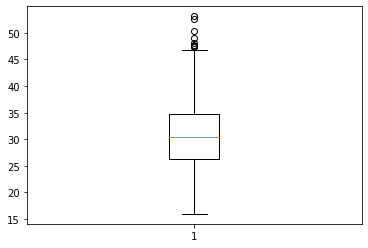

In [9]:
plt.boxplot(df['bmi'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


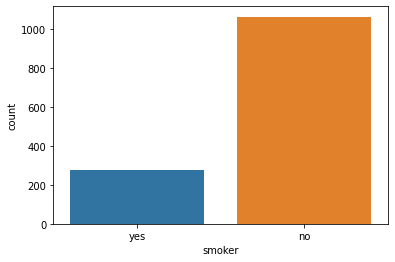

In [10]:
f = plt.figure()
sns.countplot(df['smoker'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


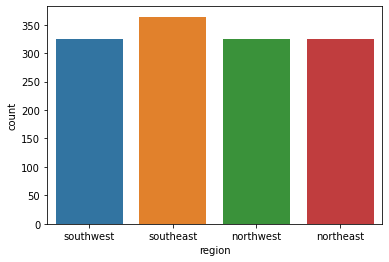

In [11]:
f = plt.figure()
sns.countplot(df['region'])
plt.show()

In [12]:
# ganti data string ke integer

df.sex.replace("male", 0 , inplace = True)
df.sex.replace("female", 1 , inplace = True)
df.smoker.replace("yes", 1 , inplace = True)
df.smoker.replace("no", 0 , inplace = True)
df.region.replace("southwest", 1 , inplace = True)
df.region.replace("southeast", 2 , inplace = True)
df.region.replace("northwest", 3 , inplace = True)
df.region.replace("northeast", 4 , inplace = True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [13]:
# membuat variabel x dan y
x = df.drop(columns='charges')
y = df['charges']

Splitting data

In [14]:
# split data menjadi data training dan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
# membuat objek linear regression
lin_reg = LinearRegression()

#train model dengan data yang sudah di split
lin_reg.fit(x_train, y_train)

LinearRegression()

In [16]:
# mengetahui nilai slope
print(lin_reg.coef_)
print(lin_reg.intercept_)

[  253.99185244    24.32455098   328.40261701   443.72929547
 23568.87948381   288.50857254]
-12840.342749982077


Age:

y = 253.99185244x - 12840.342749982077

Sex:

y = 24.32455098x - 12840.342749982077

In [17]:
y_pred = lin_reg.predict(x_test)

# cek akurasi
lin_reg.score(x_test, y_test)

0.7998747145449959

**Prediksi data**


> [  age  ,  sex   ,   BMI   ,   children   ,   smoking  ,  region   ]



Sex



> male = 0



> female = 1



Smoking


> yes = 1


> no = 0


Region




> Southwest = 1

> Southeast = 2

> Northwest = 3

> Northeast = 4



In [18]:
# prediksi
lin_reg.predict([[30,0,30,0,0,3]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([5497.01705107])

Text(0.5, 1.0, 'Actual vs Prediction')

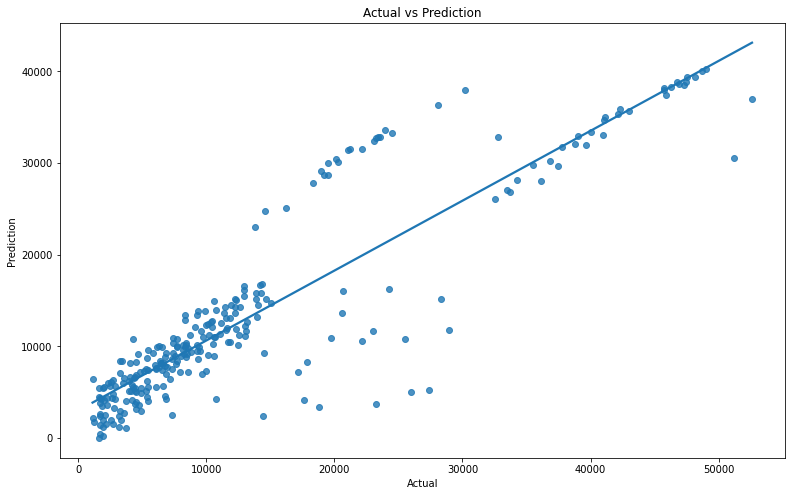

In [19]:
plt.figure(figsize = (13,8))
sns.regplot(x=y_test, y=y_pred, ci=None)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction')